In [89]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [90]:
btc = pd.read_csv('btc_dataframe.csv')

eth = pd.read_csv('eth_dataframe.csv')

bnb = pd.read_csv('bnb_dataframe.csv')

ada = pd.read_csv('ada_dataframe.csv')

xrp = pd.read_csv('xrp_dataframe.csv')

cryptos = pd.read_csv('cryptos_closing_value_df.csv')

features = pd.read_csv('features_df.csv')

features_norm = pd.read_csv('scale_features_df.csv')

# Time series model

## Prophet model

In [91]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [92]:
btc = btc[['time', 'high', 'low', 'volumefrom', 'close']]

In [93]:
btc.isnull().sum()

time          0
high          0
low           0
volumefrom    0
close         0
dtype: int64

In [94]:
btc['time'] = pd.to_datetime(btc['time'])

In [95]:
btc_prophet = btc[['time', 'close']]

In [96]:
btc_prophet.columns = ['ds', 'y']
btc_prophet

,ds,y
0,2017-01-01,995.44
1,2017-01-02,1017.05
2,2017-01-03,1033.30
3,2017-01-04,1135.41
4,2017-01-05,989.35
...,...,...
1730,2021-09-27,42187.51
1731,2021-09-28,41056.79
1732,2021-09-29,41539.43
1733,2021-09-30,43829.34


In [97]:
model = Prophet(daily_seasonality=True)
model.fit(btc_prophet)

Initial log joint probability = -44.7997


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3383.77     0.0189799       1191.73           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3413.48      0.014015       428.987           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3427.09   0.000716199       95.2546           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3445.81     0.0012636       100.127           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       3446.88    0.00034016       333.969   9.798e-07       0.001      571  LS failed, Hessian reset 
     467       3447.72   0.000262638       199.122   2.818e-06       0.001      6

In [98]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2095,2022-09-27
2096,2022-09-28
2097,2022-09-29
2098,2022-09-30
2099,2022-10-01


In [99]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2095,2022-09-27,84734.051260,72686.812418,97327.386180
2096,2022-09-28,84855.373792,72390.045990,97159.052157
2097,2022-09-29,84920.563850,72357.774311,97078.631520
2098,2022-09-30,85071.680971,71931.647801,97527.900235
2099,2022-10-01,85214.533299,72604.320583,97147.026296


In [102]:
pd.set_option('display.max_columns', None)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2095,2022-09-27,93912.245741,72686.812418,97327.386180,83105.409079,104198.096399,-9178.194481,-9178.194481,-9178.194481,-4596.34131,-4596.34131,-4596.34131,-49.621301,-49.621301,-49.621301,-4532.231870,-4532.231870,-4532.231870,0.0,0.0,0.0,84734.051260
2096,2022-09-28,94008.240538,72390.045990,97159.052157,83145.091273,104330.594337,-9152.866746,-9152.866746,-9152.866746,-4596.34131,-4596.34131,-4596.34131,-8.168230,-8.168230,-8.168230,-4548.357205,-4548.357205,-4548.357205,0.0,0.0,0.0,84855.373792
2097,2022-09-29,94104.235334,72357.774311,97078.631520,83171.051643,104456.695345,-9183.671484,-9183.671484,-9183.671484,-4596.34131,-4596.34131,-4596.34131,-33.554326,-33.554326,-33.554326,-4553.775848,-4553.775848,-4553.775848,0.0,0.0,0.0,84920.563850
2098,2022-09-30,94200.230130,71931.647801,97527.900235,83196.253059,104589.795187,-9128.549159,-9128.549159,-9128.549159,-4596.34131,-4596.34131,-4596.34131,16.140747,16.140747,16.140747,-4548.348597,-4548.348597,-4548.348597,0.0,0.0,0.0,85071.680971
2099,2022-10-01,94296.224926,72604.320583,97147.026296,83224.726438,104721.592724,-9081.691627,-9081.691627,-9081.691627,-4596.34131,-4596.34131,-4596.34131,46.698679,46.698679,46.698679,-4532.048996,-4532.048996,-4532.048996,0.0,0.0,0.0,85214.533299


In [101]:
forecast.to_csv('prophet_forecast.csv', index=False)

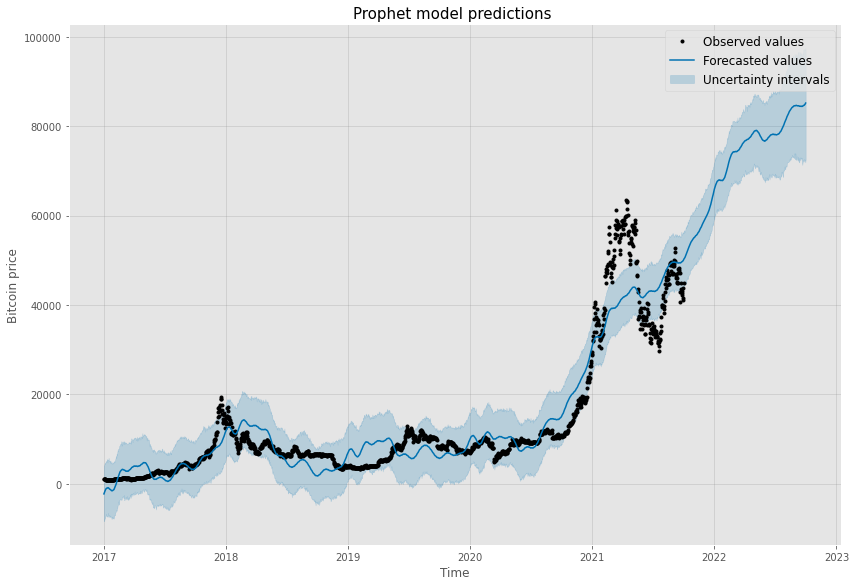

In [103]:
fig1 = model.plot(forecast, figsize= (12,8))
plt.title("Prophet model predictions ", fontsize = 15)
plt.ylabel("Bitcoin price", size = 12)
plt.xlabel('Time', size = 12)
plt.legend(labels=["Observed values", "Forecasted values", "Uncertainty intervals"],fontsize = 'large')


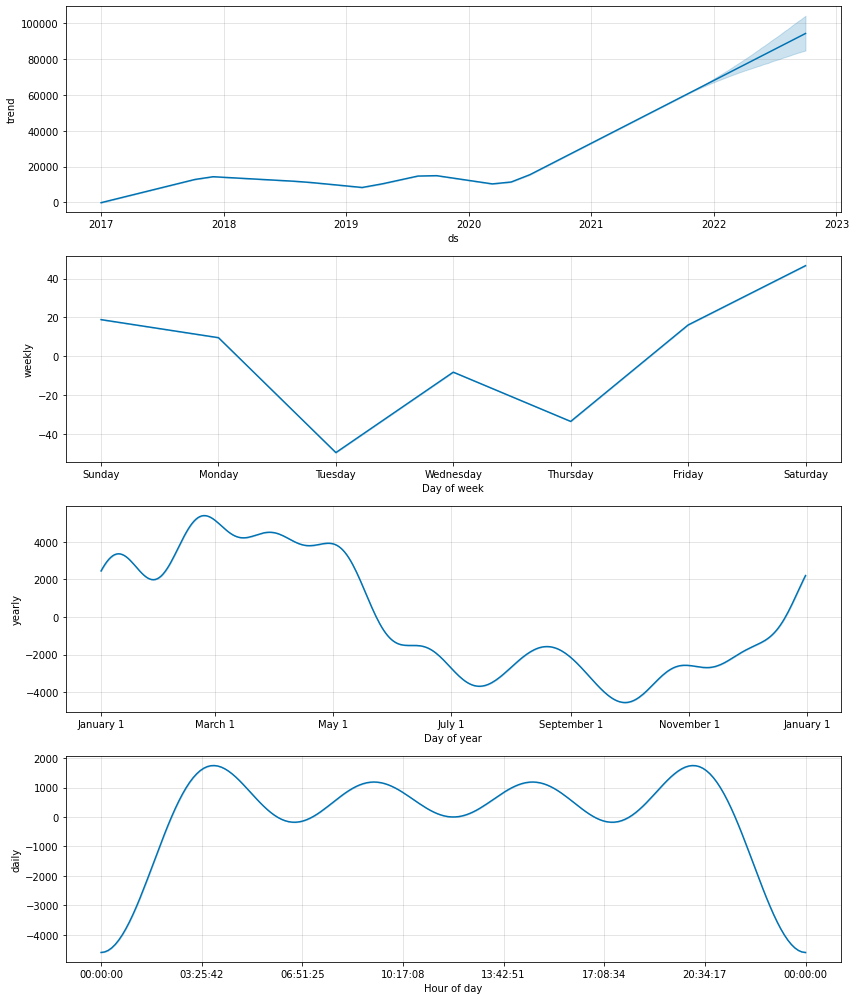

In [16]:
fig2 = model.plot_components(forecast, figsize= (12,14))


## SARIMA Model

In [47]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from tqdm import tqdm_notebook as tqdm
plt.style.use('ggplot')

In [48]:
btc_sarima = btc[['time', 'close']]

btc_sarima.set_index('time', inplace=True)

In [49]:
btc_sarima

,close
time,
2017-01-01,995.44
2017-01-02,1017.05
2017-01-03,1033.30
2017-01-04,1135.41
2017-01-05,989.35
...,...
2021-09-27,42187.51
2021-09-28,41056.79
2021-09-29,41539.43


Ckecking for trends and stationarity

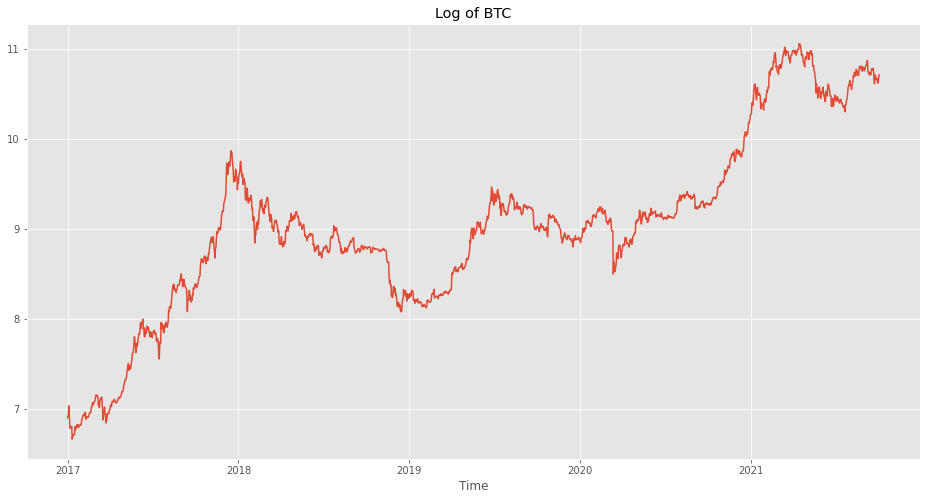

In [50]:
# Converting the data to a logarithmic scale
btc_log = pd.DataFrame(np.log(btc_sarima.close))

# Plotting the differences daily
plt.figure(figsize=(16,8))
plt.plot(btc_log)

plt.title('Log of BTC')
plt.xlabel('Time')

plt.show()

In [51]:
# Differencing the log values
log_diff = btc_log.diff().dropna()

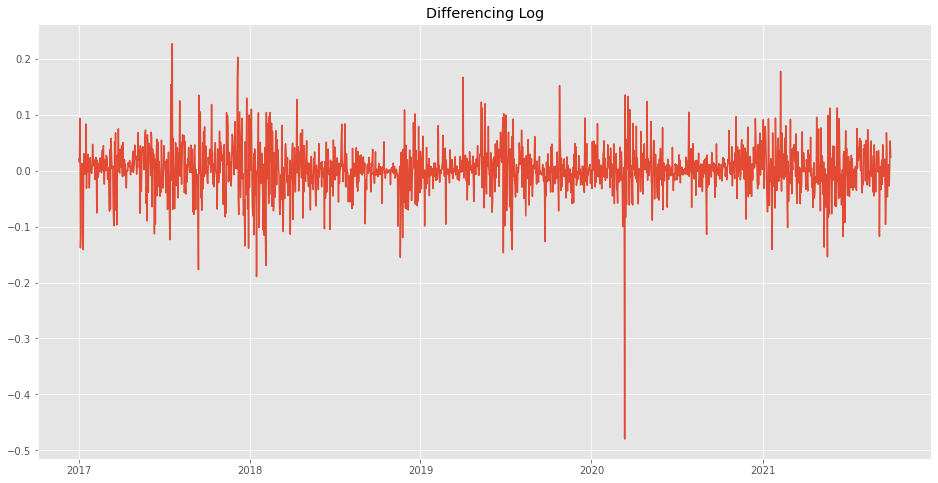

In [52]:
# Plotting the daily log difference
plt.figure(figsize=(16,8))
plt.plot(log_diff)
plt.title('Differencing Log')
plt.show()

In [53]:
# Cheking for stationarity with Dickey_Fuller test

results = adfuller(log_diff.close)
print(f"P-value: {results[1]}")

P-value: 0.0


The p-value is lower than 0,05 so we can reject the null hypothesis. Therefore we can affirm that the data is stationary.


Stationarity is important because by removing trends form the dataset we can imporve the performance and predictions of our model.

## ACF and PACF

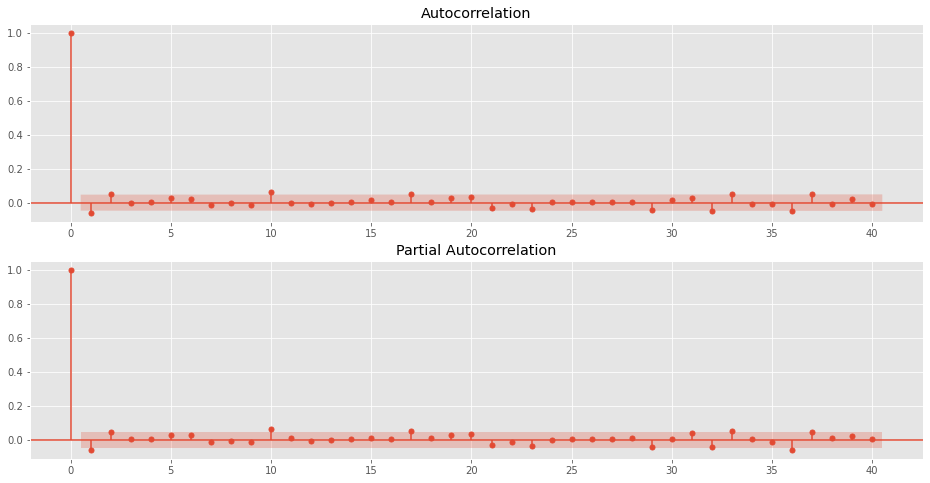

In [54]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,8))
plot_acf(log_diff, ax=ax1, lags=40)
plot_pacf(log_diff, ax=ax2, lags=40)
plt.show()

Autocorrelogram & Partail Autocorrelogram is useful that to estimate each models parametaers. It seems that there is correlation at day 10 and 17 mostly. 

SARIMA Model

In [55]:
# Seelcting the best parameters using the ones with the lowest AIC score

def best_param(model, data, pdq, pdqs):
    
    ans = []
    for comb in tqdm(pdq):
        for combs in tqdm(pdqs):
            try:
                mod = model(data,
                            order=comb,
                            seasonal_order=combs,
                            enforce_stationarity=False,
                            enforce_invertibility=False,
                            freq='D')

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    return ans_df.loc[ans_df.aic.idxmin()]

Parameters legend: 
- p: Seasonal autoregressive order.
- d: Seasonal difference order.
- q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period.

In [56]:
p = d = q = range(0,6)
d = range(2)

# Creating a list of all possible combinations of p, d, and q.
pdq = list(itertools.product(p, d, q))

# Keeping seasonality at zeros
pdqs = [(0,0,0,0)]

In [75]:
#best_param(SARIMAX, btc_log, pdq, pdqs)

Fitting and trainning the model

In [58]:
# Splitting 80/20 for the train and test 
index = round(len(btc)*.80)
train = btc_log.iloc[:index]
test = btc_log.iloc[index:]

In [60]:
model = SARIMAX(train, 
                order=(1, 0, 0), 
                seasonal_order=(0,0,0,0), 
                freq='D', 
                enforce_stationarity=False, 
                enforce_invertibility=False)
output = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.71456D+00    |proj g|=  1.99305D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     18      1     0     0   1.993D-01  -1.715D+00
  F =  -1.7145638067649274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1388
Model:               SARIMAX(1, 0, 0)   Log Likelihood                2379.815
Date:                Thu, 07 Oct 2021   AIC                          -4755.629
Time:                        17:33:43   BIC                          -4745.159
Sample:                    01-01-2017   HQIC                         -4751.713
                         - 10-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0002      0.000   7235.914      0.000       1.000       1.000
sigma2         0.0019   2.71e-05     69.751      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   4.94   Jarque-

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


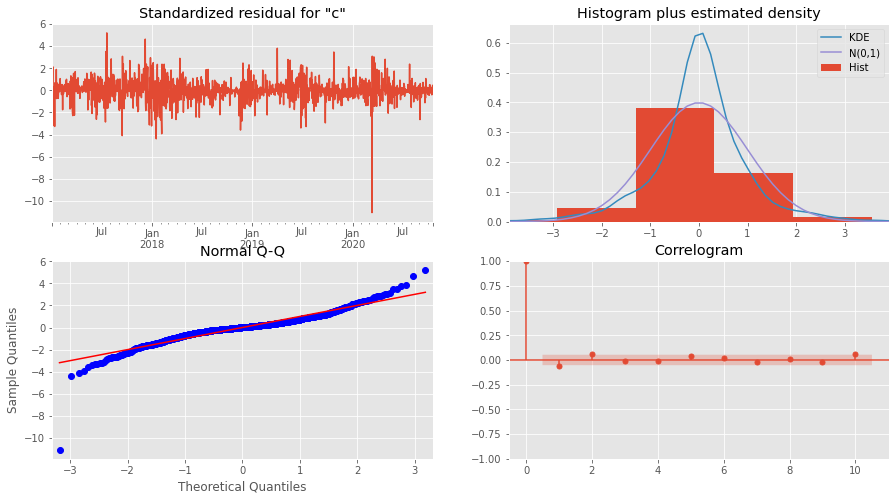

In [61]:
print(output.summary())
output.plot_diagnostics(figsize=(15,8))
plt.show()


In [67]:
# Values to test against the test set
fc   = output.get_forecast(len(test))
conf = fc.conf_int()

# Transforming the values back to normal
fc_series    = np.exp(pd.Series(fc.predicted_mean, index=test.index))
lower_series = np.exp(pd.Series(conf.iloc[:, 0], index=test.index))
upper_series = np.exp(pd.Series(conf.iloc[:, 1], index=test.index))

etrain = np.exp(train)
etest  = np.exp(test)

# Values to test against the train set, see how the model fits
predictions = output.get_prediction(start=pd.to_datetime('2017'), dynamic=False)
pred        = np.exp(predictions.predicted_mean)

# Confidence interval for the training set
conf_int   = np.exp(predictions.conf_int())
low_conf   = np.exp(pd.Series(conf_int.iloc[:,0], index=train.index))
upper_conf = np.exp(pd.Series(conf_int.iloc[:,1], index=train.index))

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


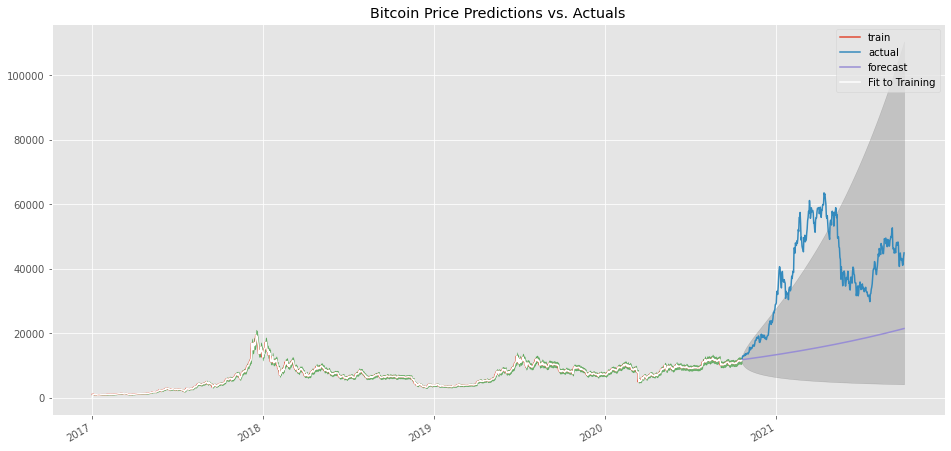

In [74]:
rcParams['figure.figsize'] = 16, 8

# Plotting the training set, test set,forecast, and confidence interval.
plt.plot(etrain, label='train')
plt.plot(etest, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

# Plotting against the training data
pred.plot(label='Fit to Training', color='w')

# Confidence interval for the fitted data
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='g', alpha=.5)


plt.title('Bitcoin Price Predictions vs. Actuals')
plt.legend()
plt.savefig('btc_fit_fc.png')
plt.show()

In [72]:
forecast = pred
actual_val = etrain.close

# Calculating our errors
rmse = np.sqrt(((forecast - actual_val) ** 2).mean())

print("The Root Mean Squared Error: ", rmse)


The Root Mean Squared Error:  358.7128397381335


### Forecasting future values

In [76]:
model = SARIMAX(btc_log, 
                order=(1, 0, 0), 
                seasonal_order=(0,0,0,0), 
                freq='D', 
                enforce_stationarity=False, 
                enforce_invertibility=False)
output = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.71806D+00    |proj g|=  2.19111D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     17      1     0     0   2.191D-01  -1.718D+00
  F =  -1.7180609990392208     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [77]:
# Getting the forecast of future values
future = output.get_forecast(steps=30)

# Transforming values back
pred_fut = np.exp(future.predicted_mean)

# Confidence interval for our forecasted values
pred_conf = future.conf_int()

# Transforming value back
pred_conf = np.exp(pred_conf)

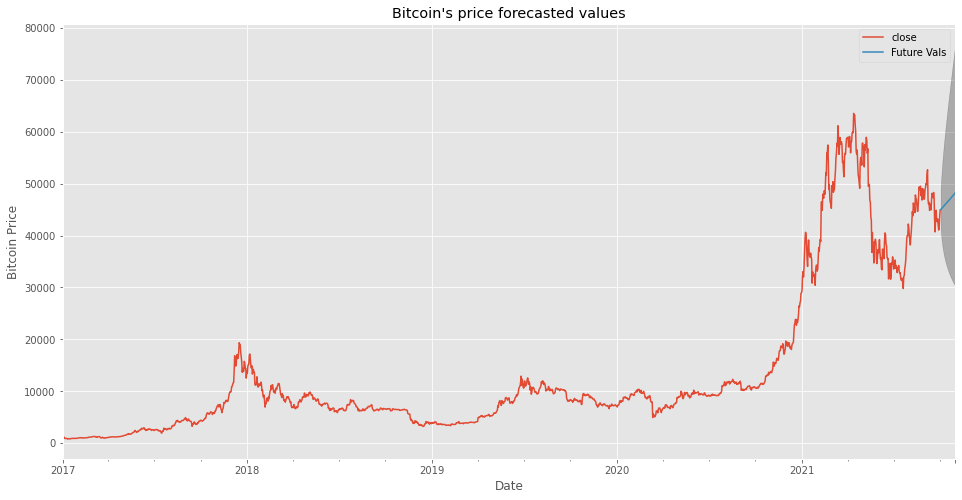

In [80]:

# Plotting the prices up to the most recent
ax = np.exp(btc_log).plot(label='Actual', figsize=(16,8))

# Plottting the forecast
pred_fut.plot(ax=ax, label='Future Vals')

# Shading in the confidence interval
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')
#ax.set_xlim(['2017-01', '2021-10'])

plt.title("Bitcoin's price forecasted values")
plt.legend()
plt.show()

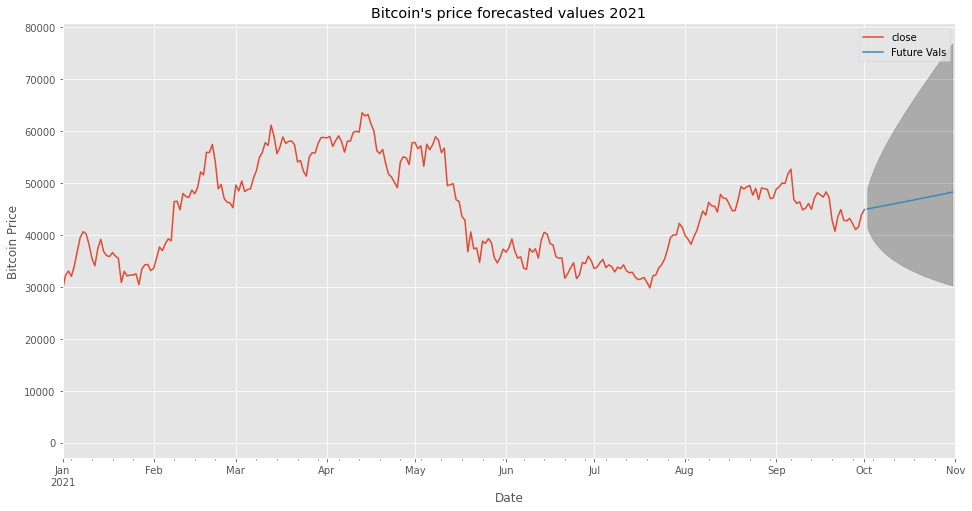

In [85]:
ax = np.exp(btc_log).plot(label='Actual', figsize=(16,8))
pred_fut.plot(ax=ax, label='Future Vals')

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')
ax.set_xlim(['2021-01','2021-11'])

plt.title("Bitcoin's price forecasted values 2021")
plt.legend()
plt.savefig('fc_zoom.png')
plt.show()

In [86]:
pred_fut

2021-10-02    45017.667778
2021-10-03    45125.446942
2021-10-04    45233.508286
2021-10-05    45341.852607
2021-10-06    45450.480703
2021-10-07    45559.393376
2021-10-08    45668.591430
2021-10-09    45778.075671
2021-10-10    45887.846908
2021-10-11    45997.905952
2021-10-12    46108.253616
2021-10-13    46218.890717
2021-10-14    46329.818072
2021-10-15    46441.036504
2021-10-16    46552.546836
2021-10-17    46664.349892
2021-10-18    46776.446503
2021-10-19    46888.837499
2021-10-20    47001.523712
2021-10-21    47114.505980
2021-10-22    47227.785141
2021-10-23    47341.362035
2021-10-24    47455.237507
2021-10-25    47569.412402
2021-10-26    47683.887569
2021-10-27    47798.663860
2021-10-28    47913.742128
2021-10-29    48029.123230
2021-10-30    48144.808024
2021-10-31    48260.797373
Freq: D, Name: predicted_mean, dtype: float64